[*********************100%***********************]  1 of 1 completed

Epoch 1/20



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0087 - val_loss: 0.0064
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 8.8337e-05 - val_loss: 0.0031
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 7.0293e-05 - val_loss: 0.0020
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 7.2077e-05 - val_loss: 0.0023
Epoch 5/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 7.0243e-05 - val_loss: 0.0020
Epoch 6/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.1362e-05 - val_loss: 0.0016
Epoch 7/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.0249e-05 - val_loss: 0.0011
Epoch 8/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.7873e-05 - val_loss: 0.0011
Epoch 9/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 4.9257e-05 - val_loss: 0.0011
Epoch 10/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 4.8229e-05 - val_loss: 8.2993e-04
Epoch 11/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 4.6373e-05 - val_loss: 7.4914e-04
Epoch 12/20
95/95 ━━━━━━━━

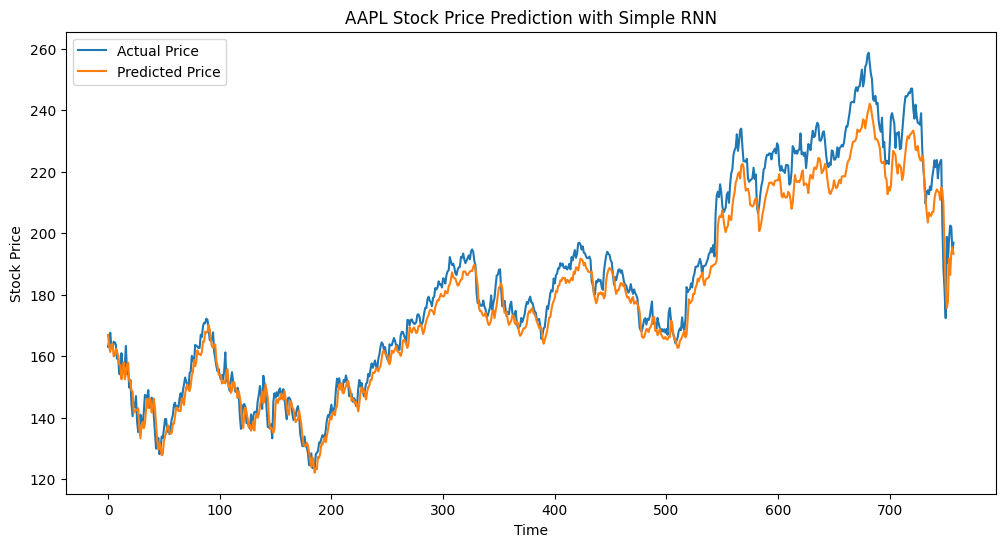

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import yfinance as yf


company = 'AAPL'
start_date = '2010-01-01'
end_date = '2025-04-20'
df = yf.download(company, start=start_date, end=end_date)

# 2. Prepare closing price data
data = df[['Close']].values

# 3. Scale data to [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# 4. Create sequences (X) and targets (y)
look_back = 60  # days of history to use for prediction
X, y = [], []
for i in range(look_back, len(data_scaled)):
    X.append(data_scaled[i-look_back:i, 0])
    y.append(data_scaled[i, 0])
X, y = np.array(X), np.array(y)
# Reshape X: [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# 5. Split into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 6. Build and compile the RNN model
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(look_back, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# 7. Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# 8. Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_true = scaler.inverse_transform(y_test.reshape(-1, 1))

# 9. Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test_true, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title(f'{ticker} Stock Price Prediction with Simple RNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Tips:
# - Swap SimpleRNN for LSTM/GRU for potentially better performance:
#     from tensorflow.keras.layers import LSTM
#     model = Sequential([LSTM(50, input_shape=(look_back, 1)), Dense(1)])
# - Play with look_back, batch_size, epochs, and number of units.
# - Install dependencies via: pip install yfinance tensorflow scikit-learn matplotlib pandas


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


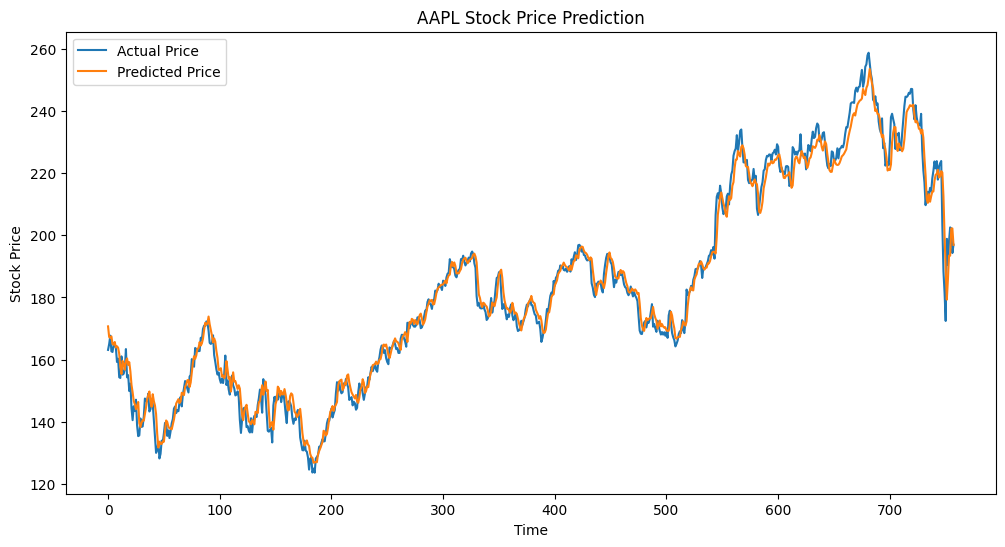

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import yfinance as yf

# Fetch data, only keep 'Close' price
df = yf.download('AAPL', start='2010-01-01', end='2025-04-20')[['Close']]
if df.empty:
    raise ValueError("No data found.")

# Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# Create sequences
look_back = 60
X, y = [], []
for i in range(look_back, len(data_scaled)):
    X.append(data_scaled[i - look_back:i])
    y.append(data_scaled[i, 0])
X, y = np.array(X), np.array(y)


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(look_back, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual prices
y_test_true = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape for inverse transform

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test_true, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_true, predictions)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test_true, predictions)
r2 = r2_score(y_test_true, predictions)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 17.451663278352967
Root Mean Squared Error (RMSE): 4.177518794494283
Mean Absolute Error (MAE): 3.1115553460838297
R-squared (R2): 0.9838360860811125
